# Data Science Basics - Detecting an Outlier

While performing exploratory data analysis, it is important to detect and properly deal with the outliers in our data set. <br>
An outlier can be there in our data set due to the following reasons :- <br>
- Error in inputting the data 
- Variance in our data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

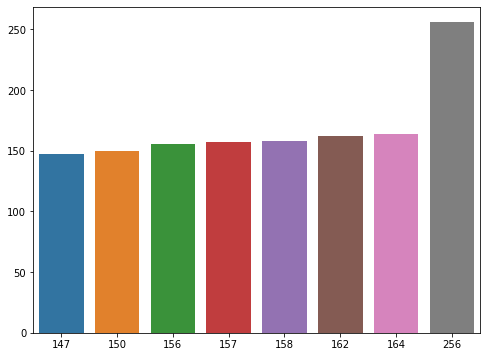

In [2]:
plt.figure(figsize=(8,6))
heights = [150,158,156,162,147,164,157,256,150]
sns.barplot(heights,heights)

We try to find outliers in the "Titanic" dataset which is available on Kaggle. 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/eshitagoel/Titanic_Survival/master/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let us focus on the "Fare" feature. It holds the amount paid by each passenger for the ticket. 

In [4]:
X = df["Fare"].values
len(X)

891

We have 891 values

# Various ways to find outliers : 

## 1. Scatter Plot

Let us plot these values in a scatter plot and see how they vary from passenger to passenger

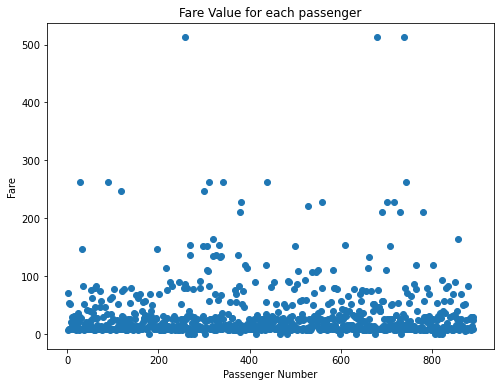

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(range(1,892),X)
plt.xlabel("Passenger Number")
plt.ylabel("Fare")
plt.title("Fare Value for each passenger")
plt.show()

<b>Observation: </b>We can see that some passenger paid a very high price for the ticket. Most passengers have paid between 0 to 300 but there are few passengers that have paid over 500 as well.<br>
This could either be an error in recording the values for the Fare. Or it could be because these people could afford to pay a high price for maybe a more premium ticket. 

## 2. Box Plot
We can use a box plot to see if we have any outliers in our data. <br>
A box plot will show the outleirs at dots or points.

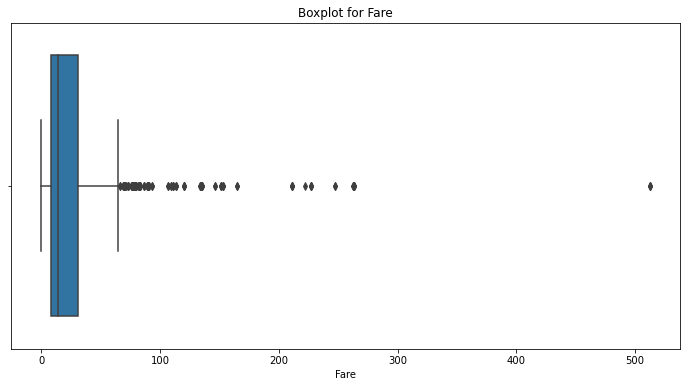

In [6]:
plt.figure(figsize = (12,6))
sns.boxplot(X)
plt.xlabel("Fare")
plt.title("Boxplot for Fare")
plt.show()

<b>Observation: </b> We can see that there are many outliers in our data. These are represented as the dots or points after the boxplot has been plotted. We see that most of our values are between 0 and 100. <br>
Values after these values have been considered as outliers. <br>
This gives a more clear picture than a scatter plot. 

## 3. Z-Score
We can predict which values are outliers using Z-Score. <br>
The Z-Score value can be calculated as <br>
z = (observation - Mean)/(Std Deviation)<br>
z = (X – μ) / σ <br>
In statistics, a z-score tells us how many standard deviations away a value is from the mean. 

Usually, we assume that if a value is 3 standard deviations away from the mean, it is an outlier

### 2 Ways to calculate Z-Score : 
- Using the function zscore() from scipy
- Using the formula : z = (observation - Mean)/(Std Deviation)

In [7]:
from scipy import stats
z_score = stats.zscore(X)
outliers= X[np.abs(z_score)>3]
print(outliers)

[263.     263.     247.5208 512.3292 247.5208 262.375  263.     211.5
 227.525  263.     221.7792 227.525  512.3292 211.3375 227.525  227.525
 211.3375 512.3292 262.375  211.3375]


In [8]:
zscore = []
mean = np.mean(X)
std = np.std(X)

for value in X:
    zscore.append((value - mean)/std)

out = X[np.abs(zscore)>3]

print(out)

[263.     263.     247.5208 512.3292 247.5208 262.375  263.     211.5
 227.525  263.     221.7792 227.525  512.3292 211.3375 227.525  227.525
 211.3375 512.3292 262.375  211.3375]


In [9]:
len(out)

20

In [10]:
min(out)

211.3375

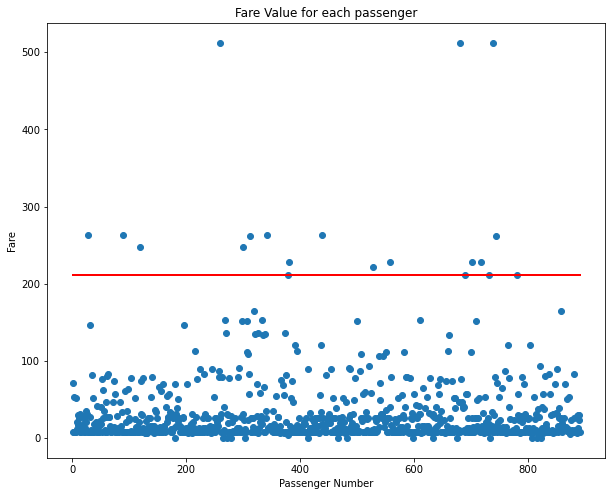

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(range(1,892),X)
plt.plot(range(1,892),np.repeat(211.3375,891),color='red',linewidth=2)
plt.xlabel("Passenger Number")
plt.ylabel("Fare")
plt.title("Fare Value for each passenger")
plt.show()

We can see that the <b>stats.zscore( )</b> function works in the same way as manually calculating the z-score

## 4. Outliers through Interquartile Range
Outliers can also be found using the interquartile range. <br>
The interquartile range is defined as the difference between the 75th and 25th percentile. <br>

We define:<br>
<b>Q1</b> = 25th percentile of our data<br>
<b>Q2</b> = 75th percentile of our data<br>
<b>IQR</b> = Q3 - Q1<br>
Usually, any value <b>x</b> such that <br>
x < Q1 - (1.5\*IQR)  OR Q3 + (1.5\*IQR) < x <br>
is considered an outlier. 

In [12]:
# For our data: 

Q1,Q3 = np.quantile(X,[.25,.75])
print("Q1 : ",Q1)
print("Q3 : ",Q3)

Q1 :  7.9104
Q3 :  31.0


In [13]:
IQR = Q3 - Q1
print("Interquartile Range (IQR) : ",IQR)

Interquartile Range (IQR) :  23.0896


In [14]:
# Defining the lower and upper bound for our data: 

lb = Q1 - 1.5*IQR
ub = Q3 + 1.5*IQR
print("Lower Bound : ",lb)
print("Upper Bound : ",ub)

Lower Bound :  -26.724
Upper Bound :  65.6344


In [15]:
outs = []
for x in X:
    if(x<lb or x>ub):
        outs.append(x)
    
print(outs)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


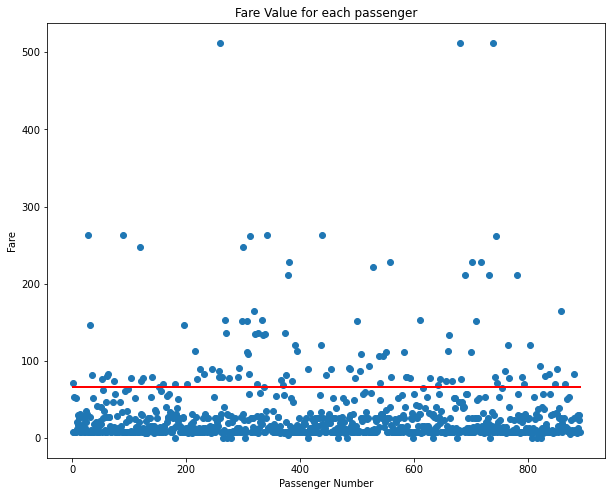

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(range(1,892),X)
plt.plot(range(1,892),np.repeat(65.6344,891),color='red',linewidth=2)
plt.xlabel("Passenger Number")
plt.ylabel("Fare")
plt.title("Fare Value for each passenger")
plt.show()